In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display
from scipy import stats

### データの読み込み

In [2]:
train_ts = pd.read_csv("../data/input/training_set.csv")
test_ts = pd.read_csv("../data/input/test_set_sample.csv")
display(train_ts.head())
display(test_ts.head())

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


,object_id,mjd,passband,flux,flux_err,detected
0,13,59798.3205,2,-1.299735,1.357315,0
1,13,59798.3281,1,-2.095392,1.148654,0
2,13,59798.3357,3,-0.923794,1.763655,0
3,13,59798.3466,4,-4.009815,2.602911,0
4,13,59798.3576,5,-3.403503,5.367328,0


In [3]:
train_meta = pd.read_csv("../data/input/training_set_metadata.csv")
test_meta = pd.read_csv("../data/input/test_set_metadata.csv")
display(train_meta.head())
display(test_meta.head())

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90


,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv
0,13,34.453125,-5.229529,169.987075,-59.956185,1,0.3048,0.3193,0.0542,41.1123,0.019
1,14,33.398438,-4.331149,167.226341,-59.936551,1,NaN,0.6323,0.0179,42.8774,0.018
2,17,348.529419,-61.755440,321.293980,-51.763351,1,NaN,0.8297,0.0605,43.6000,0.016
3,23,34.804688,-5.829153,171.307861,-60.174401,1,NaN,0.6533,0.1479,42.9640,0.023
4,34,351.321442,-64.198746,317.458993,-50.429931,1,0.4557,0.4617,0.0122,42.0540,0.023


### fluxについて

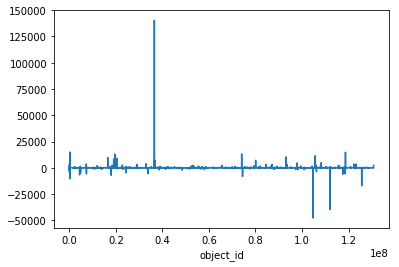

In [8]:
passband = 0
train_ts.query('passband==passband').groupby('object_id').mean()['flux'].plot()

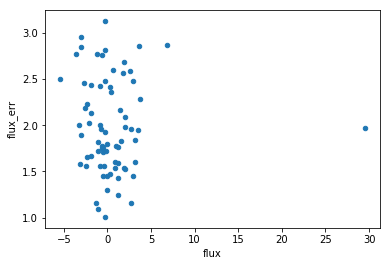

In [28]:
passband = 0
object_id = 241980
train_ts.query('object_id==@object_id and passband==@passband').plot.scatter(x='flux', y='flux_err')

### Flux_Errについて

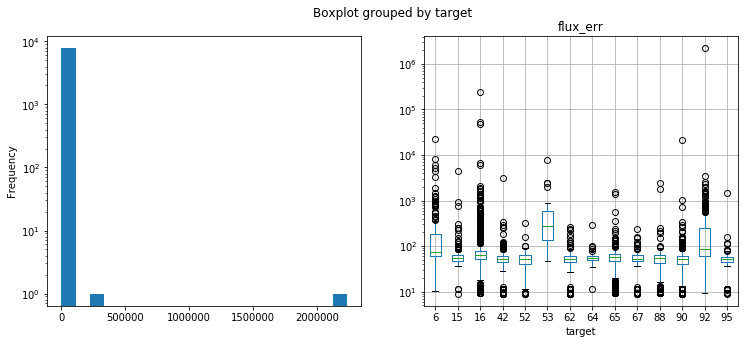

In [25]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
flux_err_agg = train_ts.groupby('object_id').max()['flux_err']
flux_err_agg.plot.hist(ax=axes[0], bins=20)
axes[0].set_yscale('log')
train_meta.set_index('object_id').join(flux_err_agg).boxplot(ax=axes[1], column=["flux_err"], by='target')
axes[1].set_yscale('log')

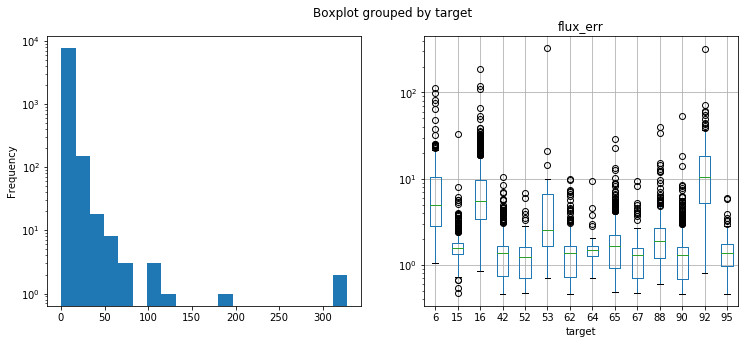

In [26]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
flux_err_agg = train_ts.groupby('object_id').min()['flux_err']
flux_err_agg.plot.hist(ax=axes[0], bins=20)
axes[0].set_yscale('log')
train_meta.set_index('object_id').join(flux_err_agg).boxplot(ax=axes[1], column=["flux_err"], by='target')
axes[1].set_yscale('log')

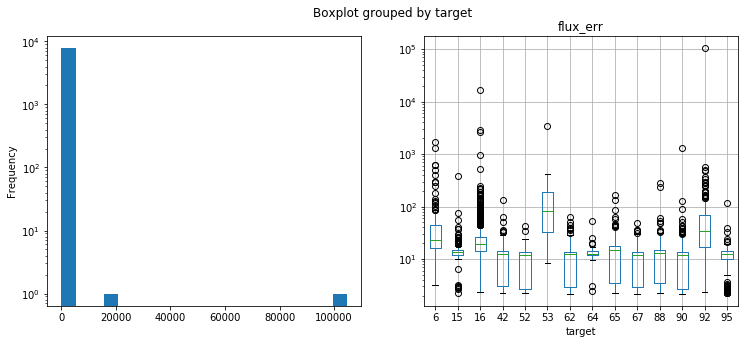

In [27]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
flux_err_agg = train_ts.groupby('object_id').mean()['flux_err']
flux_err_agg.plot.hist(ax=axes[0], bins=20)
axes[0].set_yscale('log')
train_meta.set_index('object_id').join(flux_err_agg).boxplot(ax=axes[1], column=["flux_err"], by='target')
axes[1].set_yscale('log')

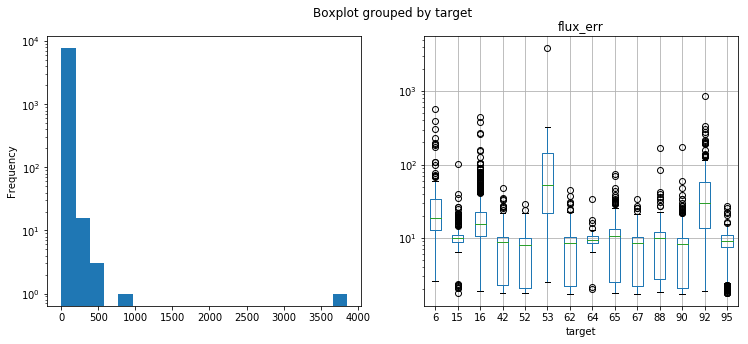

In [28]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
flux_err_agg = train_ts.groupby('object_id').median()['flux_err']
flux_err_agg.plot.hist(ax=axes[0], bins=20)
axes[0].set_yscale('log')
train_meta.set_index('object_id').join(flux_err_agg).boxplot(ax=axes[1], column=["flux_err"], by='target')
axes[1].set_yscale('log')

### detectedについて

- 1ならば、天体の輝度はリファレンスイメージよりも有意に明るい。
- 0ならば、暗い。

In [12]:
train_ts.groupby('detected').size()

detected
0    1184825
1     236880
dtype: int64

In [25]:
agg_result = train_ts.groupby(['passband', 'object_id', 'detected'])['flux'].mean().unstack()

for passband in train_ts.passband.unique():
    print(passband)
    display(agg_result.loc[passband].mean())

2


detected
0      1.589811
1    126.058482
dtype: float64

1


detected
0      1.188333
1    104.427265
dtype: float64

3


detected
0      2.438555
1    147.589925
dtype: float64

4


detected
0      2.68815
1    168.88222
dtype: float64

5


detected
0      4.433867
1    254.785453
dtype: float64

0


detected
0     27.187524
1    213.187609
dtype: float64

In [26]:
agg_result = train_ts.groupby(['passband', 'object_id', 'detected'])['flux_err'].mean().unstack()

for passband in train_ts.passband.unique():
    print(passband)
    display(agg_result.loc[passband].mean())

2


detected
0     5.740115
1    11.000713
dtype: float64

1


detected
0     9.150848
1    15.483091
dtype: float64

3


detected
0     7.481185
1    11.375933
dtype: float64

4


detected
0    13.061575
1    15.446605
dtype: float64

5


detected
0    26.677178
1    26.678056
dtype: float64

0


detected
0    212.599635
1     17.282691
dtype: float64

### MJDについて

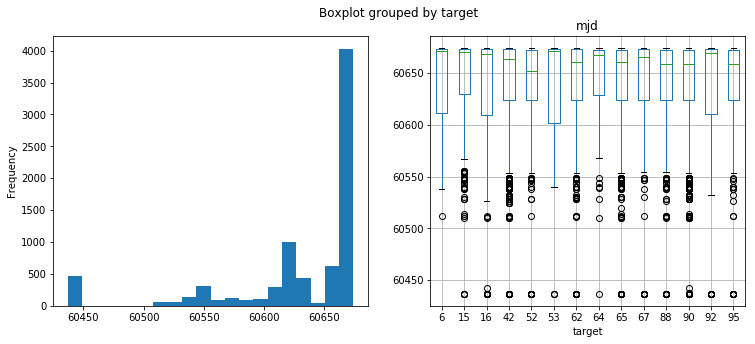

In [72]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
mjd_max = train_ts.groupby('object_id').max()['mjd']
mjd_max.plot.hist(ax=axes[0], bins=20)
train_meta.set_index('object_id').join(mjd_max).boxplot(ax=axes[1], column=["mjd"], by='target')

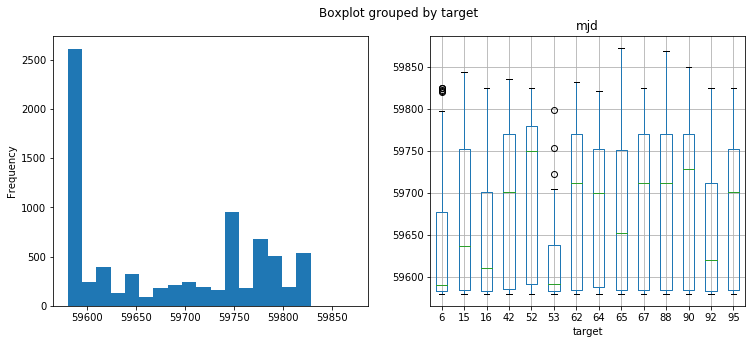

In [73]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
mjd_min = train_ts.groupby('object_id').min()['mjd']
mjd_min.plot.hist(ax=axes[0], bins=20)
train_meta.set_index('object_id').join(mjd_min).boxplot(ax=axes[1], column=["mjd"], by='target')

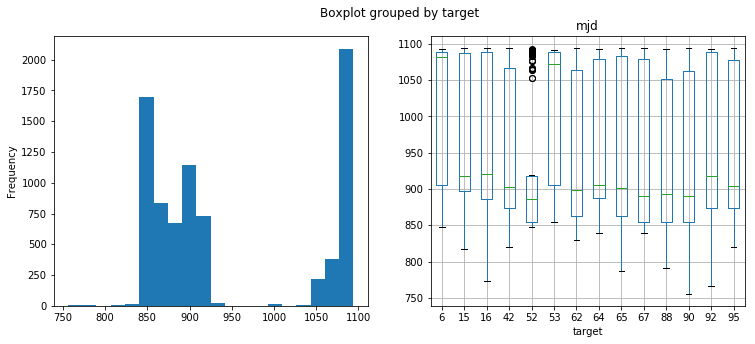

In [74]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
sub = mjd_max - mjd_min
sub.plot.hist(ax=axes[0], bins=20)
train_meta.set_index('object_id').join(sub).boxplot(ax=axes[1], column=["mjd"], by='target')

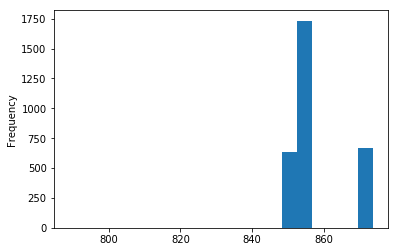

In [82]:
mjd_max = test_ts.groupby('object_id').max()['mjd']
mjd_min = test_ts.groupby('object_id').min()['mjd']
sub = mjd_max - mjd_min
sub.plot.hist(bins=20)

#### 時系列データをどのように区切るのか見当する。

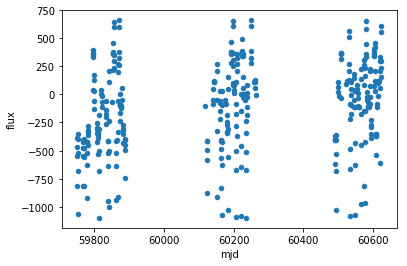

In [83]:
object_id = 615
sample = train_ts.query('object_id==@object_id').copy()
sample.plot.scatter(x='mjd', y='flux')

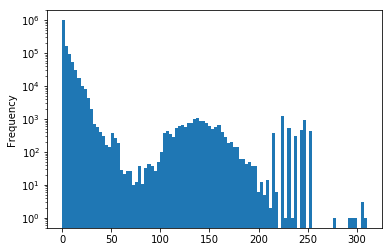

In [48]:
train_ts.sort_values(by=['object_id', 'mjd']).groupby(['object_id'])['mjd'].diff().plot.hist(bins=100)
plt.yscale('log')

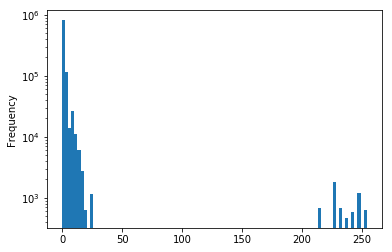

In [49]:
test_ts.sort_values(by=['object_id', 'mjd']).groupby(['object_id'])['mjd'].diff().plot.hist(bins=100)
plt.yscale('log')

In [46]:
train_ts.sort_values(by=['object_id', 'mjd']).groupby(['object_id'])['mjd'].diff().isnull().sum()

7848

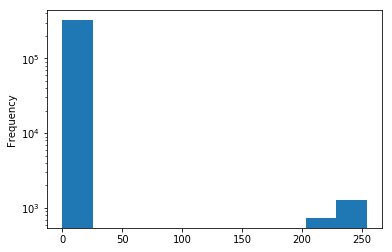

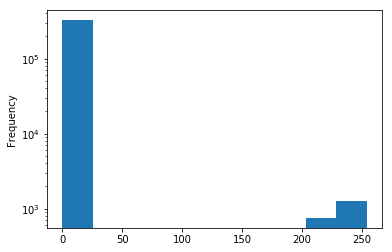

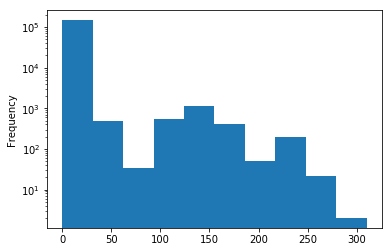

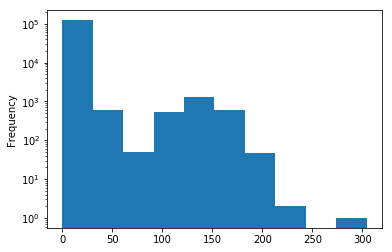

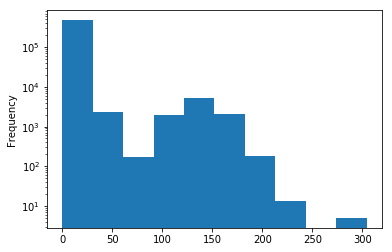

In [5]:
train_obj_list = train_ts.object_id.unique()
list1 = train_obj_list[:1000]
list2 = train_obj_list[1000:2000]
list3 = train_obj_list[2000:3000]
list4 = train_obj_list[3000:4000]
list5 = train_obj_list[4000:]
lists = [list1, list2, list3, list4, list5]

for list_ in lists:
    train_ts.query('object_id in @list_').sort_values(by=['object_id', 'mjd']).groupby(['object_id'])['mjd'].diff().plot.hist()
    plt.yscale('log')
    plt.show()

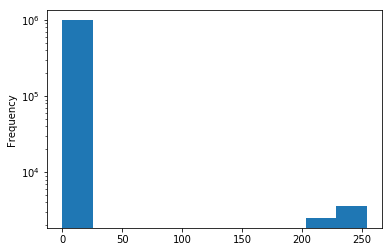

In [6]:
test_ts.sort_values(by=['object_id', 'mjd']).groupby(['object_id'])['mjd'].diff().plot.hist()
plt.yscale('log')
plt.show()

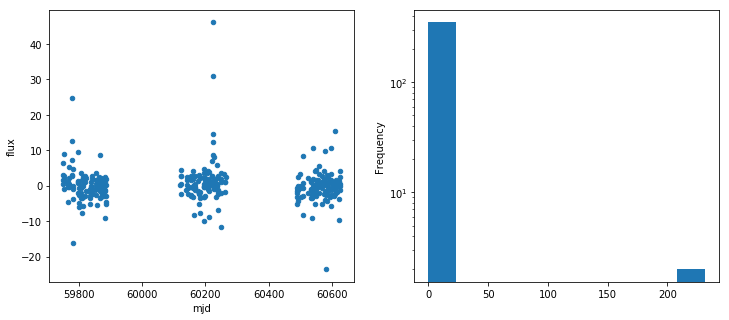

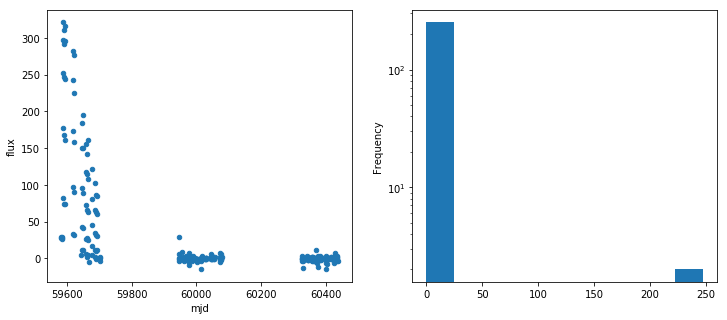

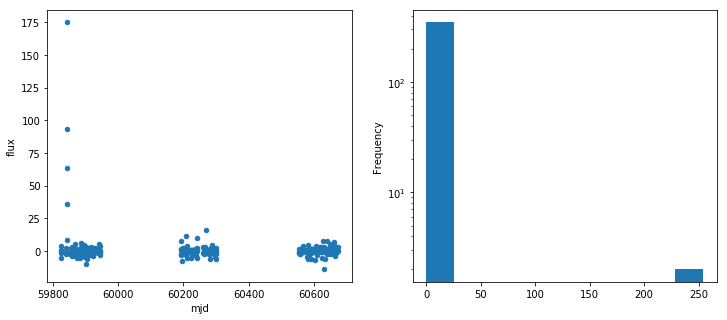

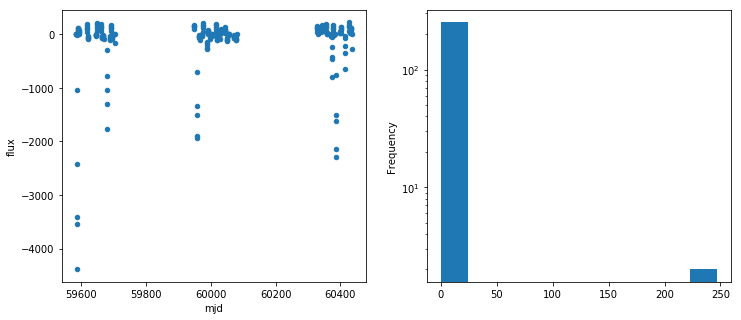

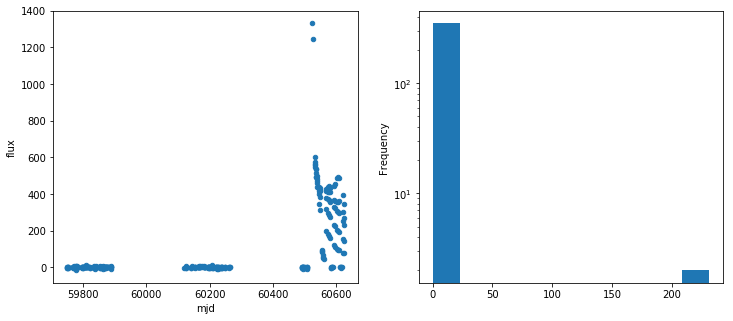

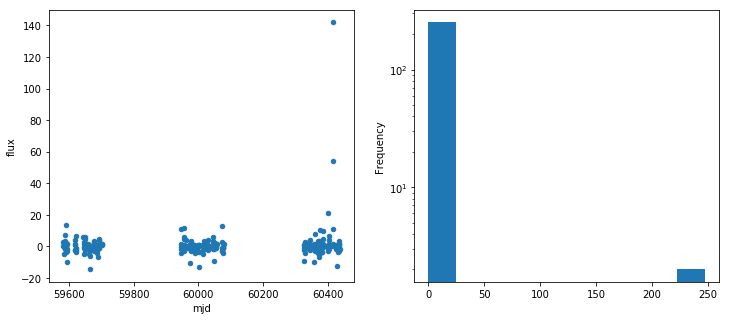

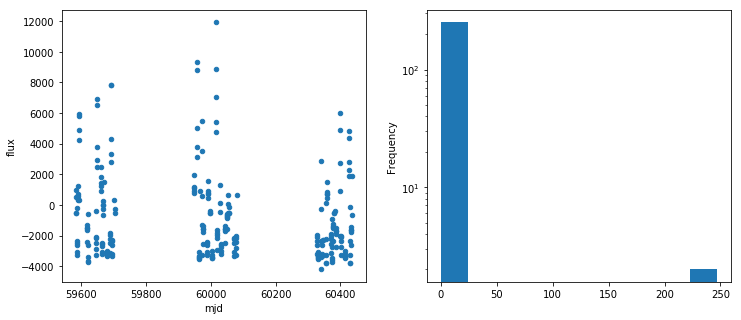

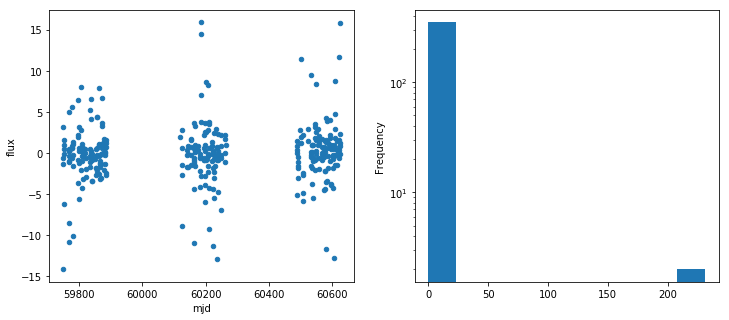

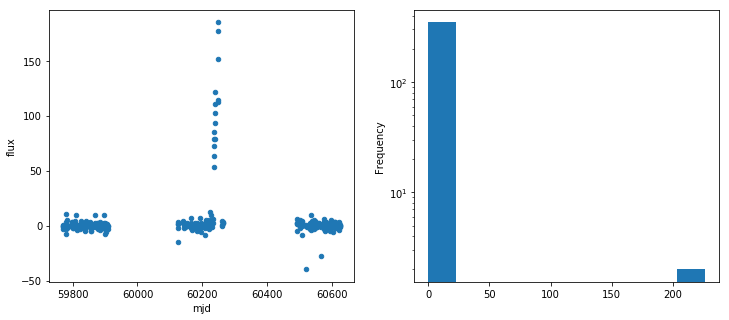

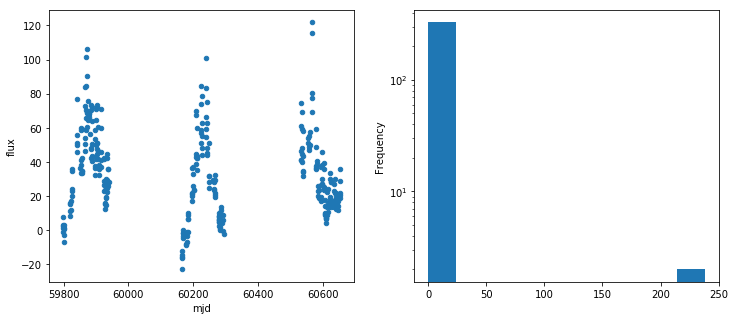

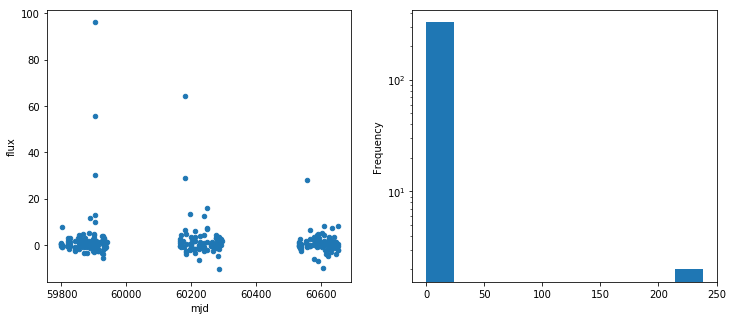

In [8]:
n_count = 0
for obj in list3:
    extract = train_ts.query('object_id==@obj')

    fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
    extract.plot.scatter(ax=axes[0], x='mjd', y='flux')
    extract.sort_values(by=['object_id', 'mjd'])['mjd'].diff().plot.hist(ax=axes[1])
    axes[1].set_yscale('log')
    plt.show()
    
    n_count += 1
    if n_count > 10:
        break

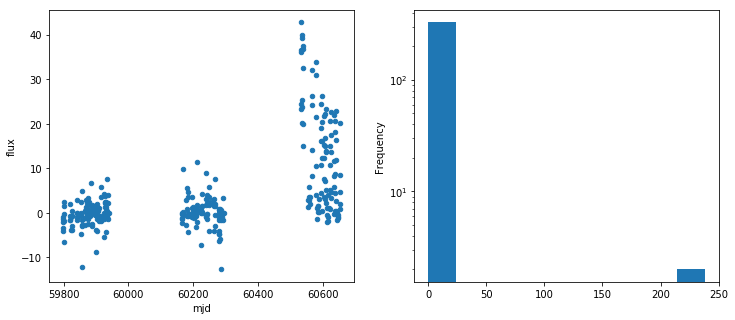

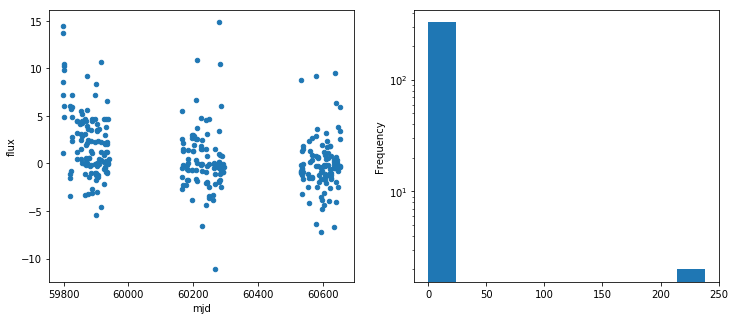

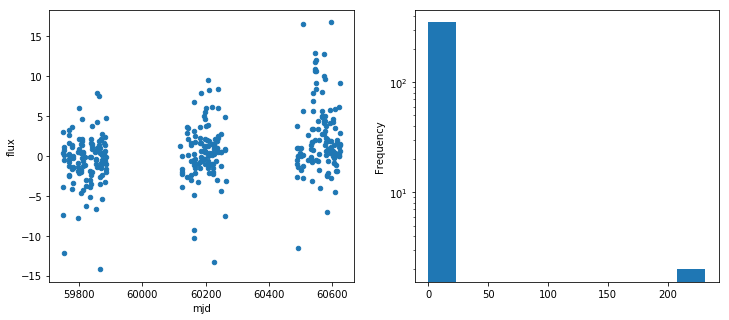

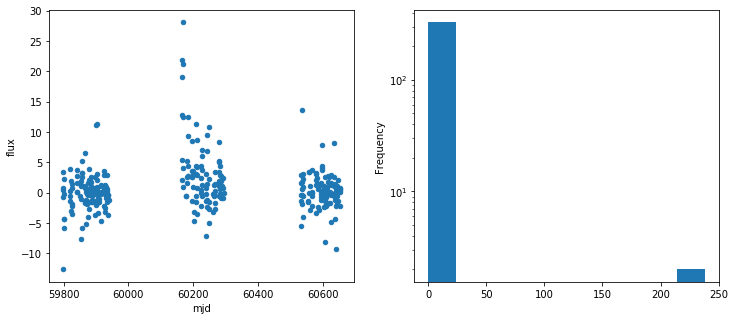

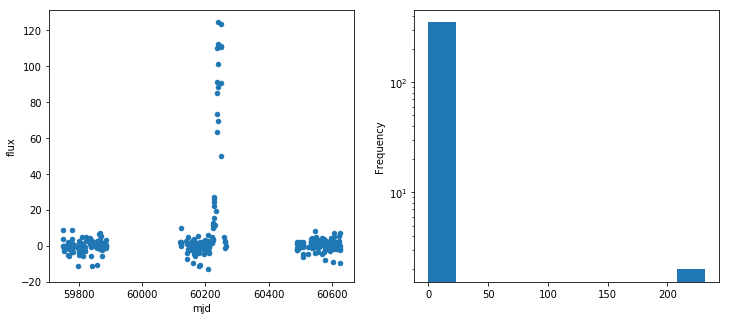

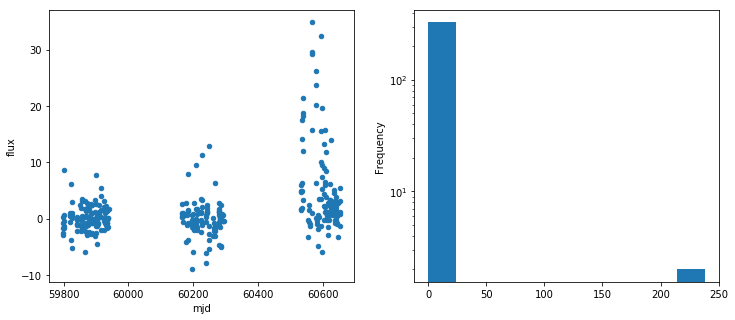

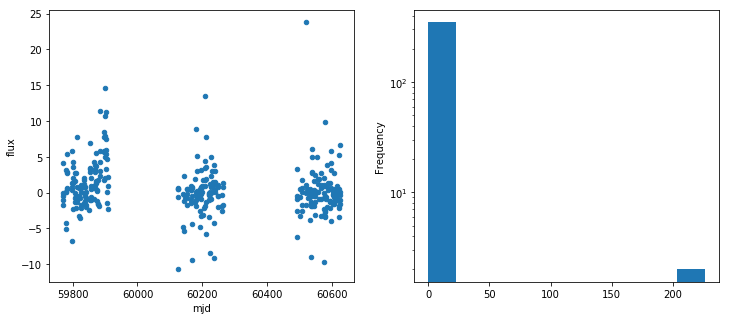

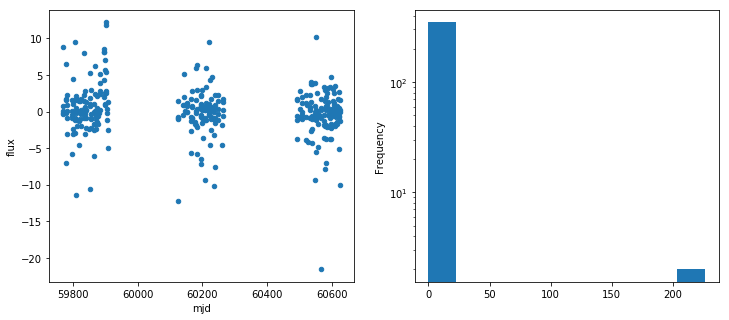

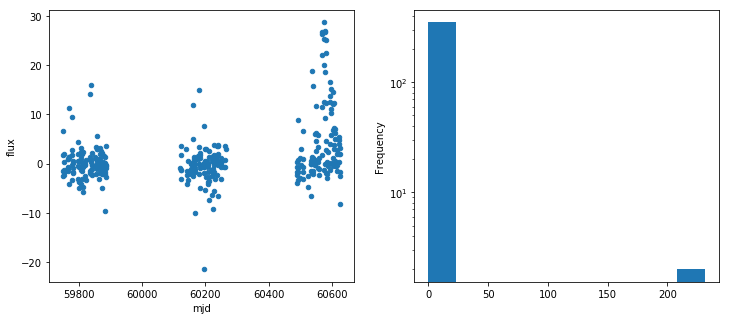

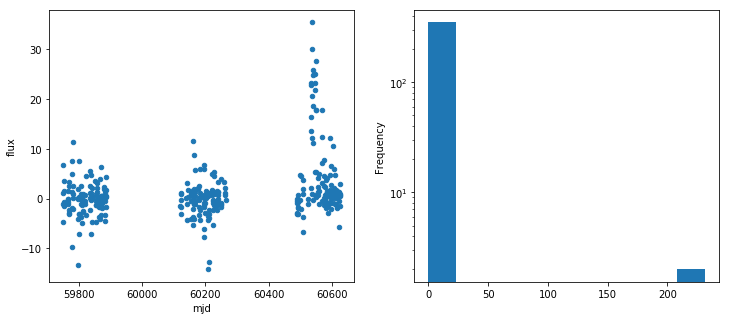

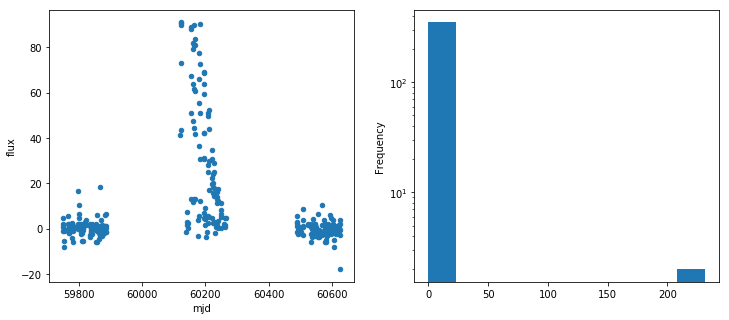

In [10]:
n_count = 0
for obj in test_ts.object_id.unique():
    extract = test_ts.query('object_id==@obj')

    fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
    extract.plot.scatter(ax=axes[0], x='mjd', y='flux')
    extract.sort_values(by=['object_id', 'mjd'])['mjd'].diff().plot.hist(ax=axes[1])
    axes[1].set_yscale('log')
    plt.show()
    
    n_count += 1
    if n_count > 10:
        break